In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#here we have read the csv file
readcsv = pd.read_csv("/content/drive/MyDrive/Regression Task/energy_efficiency_data.csv")
# converted the datset into Dataframe
df = pd.DataFrame(readcsv)
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
rows,columns =df.shape
print(f"Rows in the dataset:{rows} Columns in the dataset:{columns}")

Rows in the dataset:768 Columns in the dataset:10


In [ ]:
# Finding whether there are missing values or not in the datasets
df.isnull().sum()

,0
Relative_Compactness,0
Surface_Area,0
Wall_Area,0
Roof_Area,0
Overall_Height,0
Orientation,0
Glazing_Area,0
Glazing_Area_Distribution,0
Heating_Load,0
Cooling_Load,0


In [ ]:
# Dropping the colums with the negative correlation values
df_filtered = df.drop(columns=['Surface_Area','Relative_Compactness'])  # Drop multiple columns
df_filtered

,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...
763,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,367.5,220.50,3.5,4,0.4,5,16.48,16.61


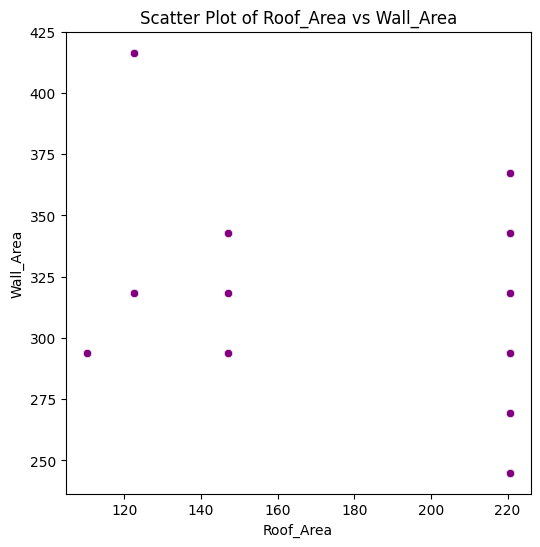

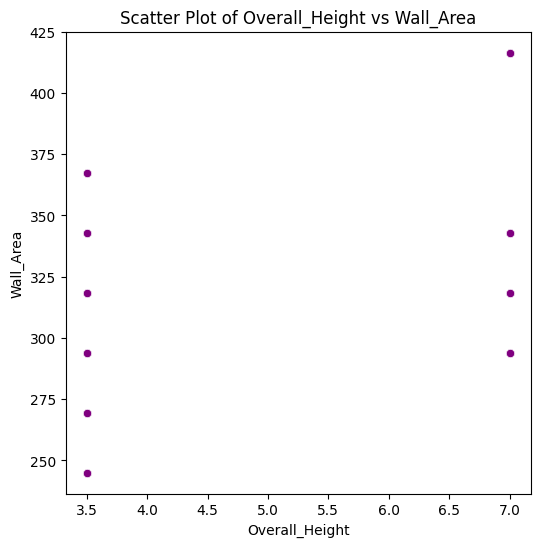

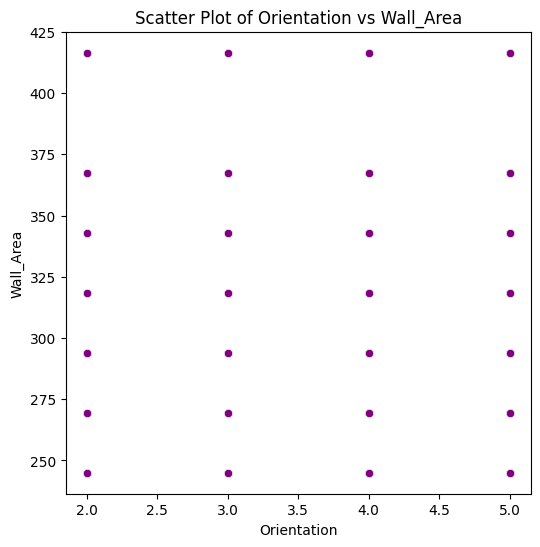

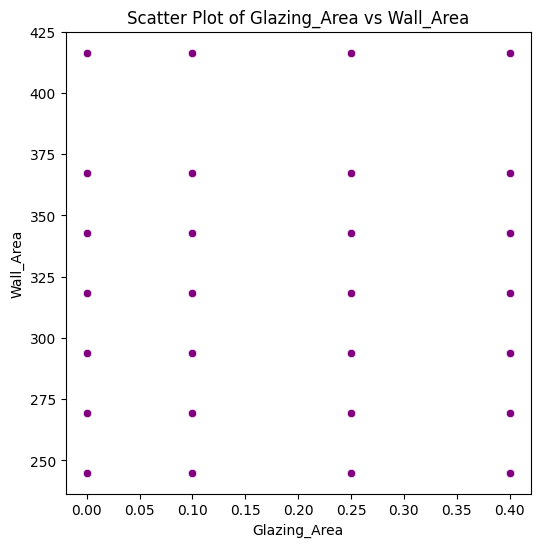

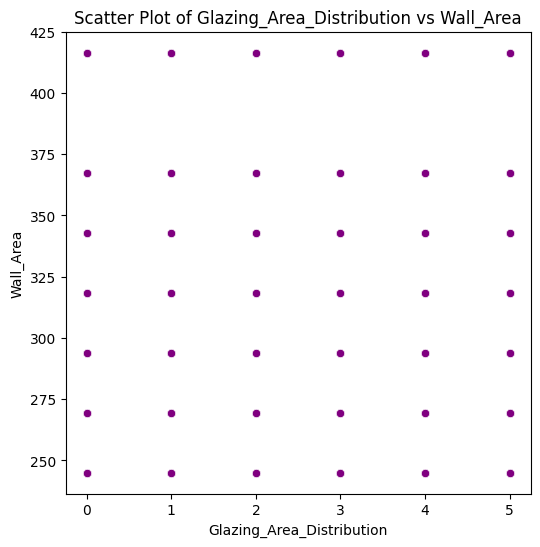

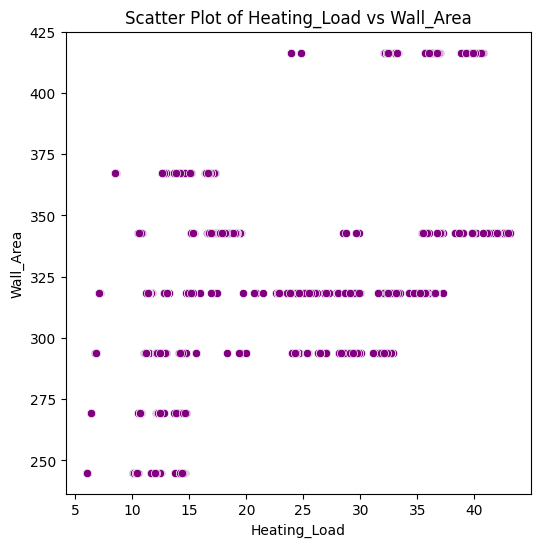

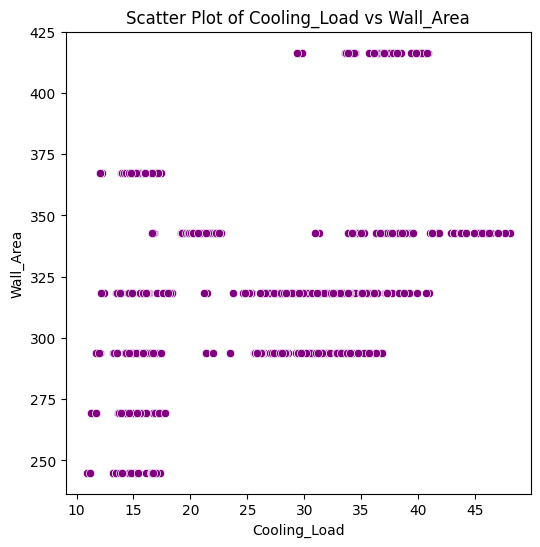

In [ ]:
col_values = ['Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

for col in col_values:
    # Check if the column exists in the DataFrame before plotting
    if col in df_filtered.columns:
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=df_filtered[col], y=df_filtered['Wall_Area'], color='purple')
        plt.xlabel(col)
        plt.ylabel('Wall_Area')
        plt.title(f'Scatter Plot of {col} vs Wall_Area')
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")

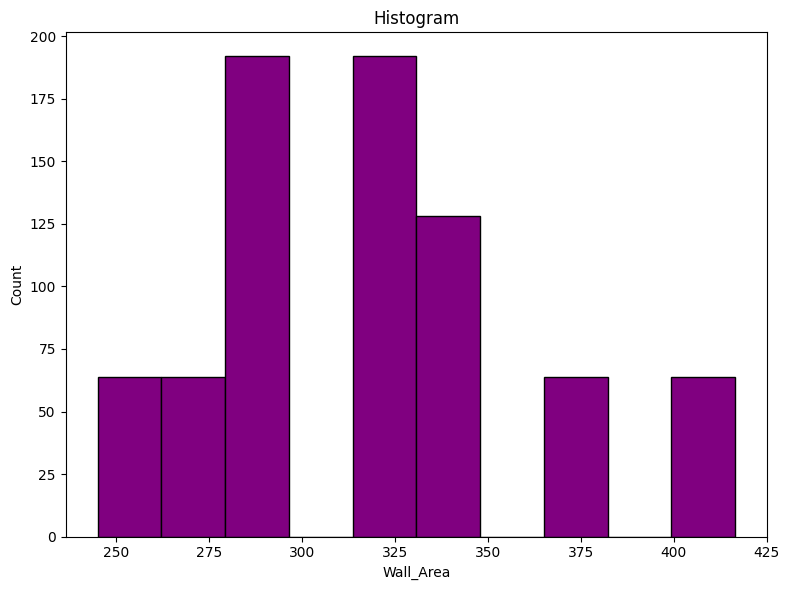

In [ ]:
# Histogramm for Wall Area
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['Wall_Area'] ,bins=10, color='purple',edgecolor='black')
plt.xlabel('Wall_Area')
plt.ylabel('Count')
plt.title('Histogram')
plt.tight_layout()
plt.show()

In [ ]:
X = df_filtered.drop(columns=['Overall_Height']).values # Ensure numerical data type
y = df_filtered['Overall_Height'].values
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Standardization
X = normalize(X)

In [ ]:
# Splitting the datas for training and testing purpose
def train_test_split_custom(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    train_indices = indices[test_size:]
    test_indices=indices[:test_size]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_seed=42)

Iteration 0: Cost = 30.2963
Iteration 100: Cost = 3.9642
Iteration 200: Cost = 0.6566
Iteration 300: Cost = 0.1980
Iteration 400: Cost = 0.1307
Iteration 500: Cost = 0.1186
Iteration 600: Cost = 0.1148
Iteration 700: Cost = 0.1127
Iteration 800: Cost = 0.1111
Iteration 900: Cost = 0.1098


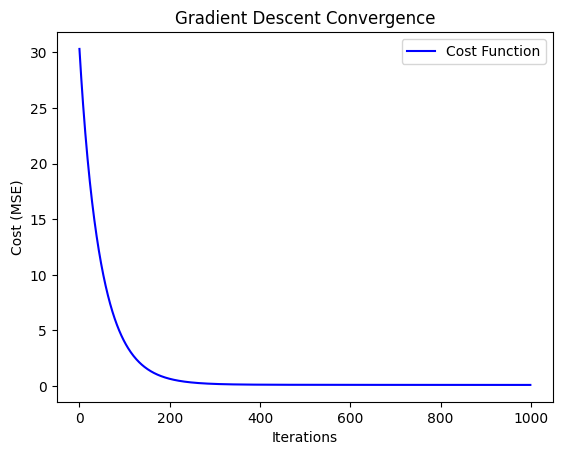

In [ ]:
n_samples, n_features = X_train.shape
weights = np.zeros(n_features)
bias = 0

# Training parameters (fixed learning rate and number of iterations)
learning_rate = 0.01
num_iterations = 1000

# Cost Function
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Training the model
cost_history = []
for i in range(num_iterations):
    y_pred = np.dot(X_train, weights) + bias
    dw = (1/n_samples) * np.dot(X_train.T, (y_pred - y_train))
    db = (1/n_samples) * np.sum(y_pred - y_train)
    weights -= learning_rate * dw
    bias -= learning_rate * db
    cost = cost_function(y_train, y_pred)
    cost_history.append(cost)
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")

# Plot cost history
plt.plot(range(len(cost_history)), cost_history, label='Cost Function', color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

In [ ]:
# Predictions
def predict(X, weights, bias):
    return np.dot(X, weights) + bias
y_pred_train = predict(X_train, weights, bias)
# print(y_pred_train)
y_pred_test = predict(X_test, weights, bias)
# print(y_pred_test)

In [ ]:
# Evaluation metrices
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [ ]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


In [ ]:
# Evaluation Metrices(Root Mean Squared Error,Mean Absolute Error,Mean Squared Error,R_squared Error)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [ ]:
print(f"Linear Regression from Scratch - Train MSE: {mse_train:.4f}, Mean Absolute Error: {mae_train:.4f}, Train RMSE: {rmse_train:.4f}, Train R²: {r2_train:.4f}")
print(f"Linear Regression from Scratch - Test MSE: {mse_test:.4f}, Mean Absolute Error: {mae_test:.4f}, Test RMSE: {rmse_test:.4f}, Test R²: {r2_test:.4f}")

Linear Regression from Scratch - Train MSE: 0.1088, Mean Absolute Error: 0.2546, Train RMSE: 0.3299, Train R²: 0.9645
Linear Regression from Scratch - Test MSE: 0.1010, Mean Absolute Error: 0.2573, Test RMSE: 0.3179, Test R²: 0.9668


USING PRE BUILT IN LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the dataset
readcsv = pd.read_csv("/content/drive/MyDrive/Regression Task/energy_efficiency_data.csv")
df = pd.DataFrame(readcsv)
df_filtered = df.drop(columns=['Surface_Area','Relative_Compactness'])

In [ ]:
# Step 2: Split the dataset into training and testing sets
X = df_filtered.drop(columns=['Overall_Height'])
y = df_filtered['Overall_Height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Build and evaluate two models

# Model 1: Linear Regression
lr_model = LinearRegression()

In [ ]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
# Fit and evaluate both models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

In [ ]:
# Evaluate Linear Regression
mse_lr, mae_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

In [ ]:
# Evaluate Random Forest
mse_rf, mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

In [ ]:
# Print Evaluation Results
print(f"Linear Regression - MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"Random Forest - MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

Linear Regression - MSE: 0.1012, MAE: 0.2473, RMSE: 0.3181, R²: 0.9668
Random Forest - MSE: 0.0000, MAE: 0.0000, RMSE: 0.0000, R²: 1.0000


In [ ]:
# Step 4: Hyperparameter Optimization with GridSearchCV

# Hyperparameters for Linear Regression (None, as it doesn't have many hyperparameters)
lr_params = {}

In [ ]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best parameters for Random Forest
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Step 5: Feature Selection using SelectKBest
# Use SelectKBest with f_regression to select the top k features
select_k_best = SelectKBest(f_regression, k=5)  # You can adjust 'k' based on your needs
X_train_selected = select_k_best.fit_transform(X_train, y_train)
X_test_selected = select_k_best.transform(X_test)

In [ ]:
# Get the selected features
selected_features = X_train.columns[select_k_best.get_support()]
print(f"Selected features: {selected_features}")

Selected features: Index(['Wall_Area', 'Roof_Area', 'Glazing_Area_Distribution', 'Heating_Load',
       'Cooling_Load'],
      dtype='object')


In [ ]:
# Step 6: Rebuild Models using Optimal Hyperparameters and Selected Features
# Linear Regression model remains the same
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected, y_train)

LinearRegression()

In [ ]:
# Random Forest with the best hyperparameters and selected features
rf_model_selected = RandomForestRegressor(n_estimators=rf_grid_search.best_params_['n_estimators'],
                                          max_depth=rf_grid_search.best_params_['max_depth'],
                                          min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                          min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
                                          random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)

In [ ]:
# Predictions
y_pred_lr_selected = lr_model_selected.predict(X_test_selected)
y_pred_rf_selected = rf_model_selected.predict(X_test_selected)

In [ ]:
# Evaluate the final models
mse_lr_final, mae_lr_final, rmse_lr_final, r2_lr_final = evaluate_model(y_test, y_pred_lr_selected)
mse_rf_final, mae_rf_final, rmse_rf_final, r2_rf_final = evaluate_model(y_test, y_pred_rf_selected)

In [ ]:
# Final evaluation
print(f"Final Linear Regression - MSE: {mse_lr_final:.4f}, MAE: {mae_lr_final:.4f}, RMSE: {rmse_lr_final:.4f}, R²: {r2_lr_final:.4f}")
print(f"Final Random Forest - MSE: {mse_rf_final:.4f}, MAE: {mae_rf_final:.4f}, RMSE: {rmse_rf_final:.4f}, R²: {r2_rf_final:.4f}")

# Step 7: Conclusion
# Analyze the results, compare both models, and discuss the effect of cross-validation, hyperparameter tuning, and feature selection

Final Linear Regression - MSE: 0.1133, MAE: 0.2565, RMSE: 0.3367, R²: 0.9628
Final Random Forest - MSE: 0.0000, MAE: 0.0000, RMSE: 0.0000, R²: 1.0000
